# MNIST Auto-Encoder

This program runs in about 67.565 seconds (Windows 11, Intel i7, 16 GB)

## Pre-requisites

Install the following Python packages

1. cloudmesh-installer
2. cloudmesh-common

In [1]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

## Exporting Output Graphs

In [2]:
def save(graph, filename):
    if os.path.exists("images"):
        pass
    else:
        Shell.mkdir("images")
    plot_model(graph, to_file=f'images/{filename}.png', show_shapes=True)
    plot_model(graph, to_file=f'images/{filename}.pdf', show_shapes=True)

## Import Libraries

In [3]:
StopWatch.start("total")
StopWatch.start("import")
StopWatch.progress(0)

import os    # noqa: E402
import cpuinfo    # noqa: E402
import numpy as np    # noqa: E402
import matplotlib.pyplot as plt    # noqa: E402
from keras.layers import Dense, Input    # noqa: E402
from keras.layers import Conv2D, Flatten    # noqa: E402
from keras.layers import Reshape, Conv2DTranspose    # noqa: E402
from keras.models import Model    # noqa: E402
from keras.datasets import mnist    # noqa: E402
from keras.utils import plot_model    # noqa: E402
from keras import backend as K    # noqa: E402
from cloudmesh.common.systeminfo import os_is_windows    # noqa: E402
from cloudmesh.common.Shell import Shell    # noqa: E402

StopWatch.stop("import")
StopWatch.progress(10)

# cloudmesh status=running progress=0 pid=41577845

2022-08-14 00:18:31.564007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/current/lib:/share/rci_apps/common/lib64
2022-08-14 00:18:31.564054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# cloudmesh status=running progress=10 pid=41577845

'# cloudmesh status=running progress=10 pid=41577845'

## Data Load

In [4]:
StopWatch.start("data-load")

(x_train, y_train), (x_test, y_test) = mnist.load_data()

StopWatch.stop("data-load")
StopWatch.progress(11)

# cloudmesh status=running progress=11 pid=41577845

'# cloudmesh status=running progress=11 pid=41577845'

## Data Pre-Process

In [5]:
StopWatch.start("data-pre-process")

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size, image_size, 1)

StopWatch.stop("data-pre-process")
StopWatch.progress(12)

# cloudmesh status=running progress=12 pid=41577845

'# cloudmesh status=running progress=12 pid=41577845'

## Define Model

In [6]:
StopWatch.start("compile")

batch_size = 32
kernel_size = 3
latent_dim = 16
hidden_units = [32, 64]

inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
x = Dense(hidden_units[0], activation='relu')(x)
x = Dense(hidden_units[1], activation='relu')(x)

shape = K.int_shape(x)

# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs,
                latent,
                name='encoder')
encoder.summary()
save(encoder, 'encoder')

latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Dense(hidden_units[0], activation='relu')(x)
x = Dense(hidden_units[1], activation='relu')(x)

outputs = Dense(1, activation='relu')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
save(decoder, 'decoder')

autoencoder = Model(inputs,
                    decoder(encoder(inputs)),
                    name='autoencoder')
autoencoder.summary()
save(autoencoder, 'autoencoder')

autoencoder.compile(loss='mse', optimizer='adam')

StopWatch.stop('compile')
StopWatch.progress(15)

Model: "encoder"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         


 dense (Dense)               (None, 28, 28, 32)        64        


 dense_1 (Dense)             (None, 28, 28, 64)        2112      


 flatten (Flatten)           (None, 50176)             0         


 latent_vector (Dense)       (None, 16)                802832    


Total params: 805,008


Trainable params: 805,008


Non-trainable params: 0


_________________________________________________________________


2022-08-14 00:18:36.134581: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-14 00:18:36.134632: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (udc-aj37-18c1): /proc/driver/nvidia/version does not exist
2022-08-14 00:18:36.135903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "decoder"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 decoder_input (InputLayer)  [(None, 16)]              0         


 dense_2 (Dense)             (None, 50176)             852992    


 reshape (Reshape)           (None, 28, 28, 64)        0         


 dense_3 (Dense)             (None, 28, 28, 32)        2080      


 dense_4 (Dense)             (None, 28, 28, 64)        2112      


 dense_5 (Dense)             (None, 28, 28, 1)         65        


Total params: 857,249


Trainable params: 857,249


Non-trainable params: 0


_________________________________________________________________


Model: "autoencoder"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         


 encoder (Functional)        (None, 16)                805008    


 decoder (Functional)        (None, 28, 28, 1)         857249    


Total params: 1,662,257


Trainable params: 1,662,257


Non-trainable params: 0


_________________________________________________________________


# cloudmesh status=running progress=15 pid=41577845

'# cloudmesh status=running progress=15 pid=41577845'

## Train

In [7]:
StopWatch.start("train")

autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=1,
                batch_size=batch_size)

StopWatch.stop("train")
StopWatch.progress(95)

   1/1875 [..............................] - ETA: 14:39 - loss: 0.1171

   3/1875 [..............................] - ETA: 1:28 - loss: 0.1186 

   5/1875 [..............................] - ETA: 1:28 - loss: 0.1105

   7/1875 [..............................] - ETA: 1:29 - loss: 0.0989

   8/1875 [..............................] - ETA: 1:30 - loss: 0.0967

   9/1875 [..............................] - ETA: 1:31 - loss: 0.0947

  11/1875 [..............................] - ETA: 1:30 - loss: 0.0896

  13/1875 [..............................] - ETA: 1:30 - loss: 0.0867

  14/1875 [..............................] - ETA: 1:30 - loss: 0.0852

  15/1875 [..............................] - ETA: 1:31 - loss: 0.0840

  17/1875 [..............................] - ETA: 1:30 - loss: 0.0815

  19/1875 [..............................] - ETA: 1:30 - loss: 0.0797

  21/1875 [..............................] - ETA: 1:30 - loss: 0.0783

  22/1875 [..............................] - ETA: 1:30 - loss: 0.0778

  24/1875 [..............................] - ETA: 1:29 - loss: 0.0764

  26/1875 [..............................] - ETA: 1:29 - loss: 0.0752

  27/1875 [..............................] - ETA: 1:30 - loss: 0.0749

  28/1875 [..............................] - ETA: 1:30 - loss: 0.0746

  29/1875 [..............................] - ETA: 1:30 - loss: 0.0742

  31/1875 [..............................] - ETA: 1:30 - loss: 0.0736

  32/1875 [..............................] - ETA: 1:30 - loss: 0.0732

  34/1875 [..............................] - ETA: 1:29 - loss: 0.0726

  35/1875 [..............................] - ETA: 1:30 - loss: 0.0723

  37/1875 [..............................] - ETA: 1:30 - loss: 0.0715

  39/1875 [..............................] - ETA: 1:29 - loss: 0.0709

  40/1875 [..............................] - ETA: 1:30 - loss: 0.0707

  41/1875 [..............................] - ETA: 1:30 - loss: 0.0705

  42/1875 [..............................] - ETA: 1:30 - loss: 0.0701

  44/1875 [..............................] - ETA: 1:30 - loss: 0.0696

  45/1875 [..............................] - ETA: 1:30 - loss: 0.0693

  46/1875 [..............................] - ETA: 1:30 - loss: 0.0690

  47/1875 [..............................] - ETA: 1:30 - loss: 0.0687

  48/1875 [..............................] - ETA: 1:30 - loss: 0.0685

  49/1875 [..............................] - ETA: 1:30 - loss: 0.0683

  50/1875 [..............................] - ETA: 1:30 - loss: 0.0682

  52/1875 [..............................] - ETA: 1:30 - loss: 0.0678

  53/1875 [..............................] - ETA: 1:30 - loss: 0.0677

  55/1875 [..............................] - ETA: 1:30 - loss: 0.0673

  57/1875 [..............................] - ETA: 1:30 - loss: 0.0669

  59/1875 [..............................] - ETA: 1:29 - loss: 0.0665

  61/1875 [..............................] - ETA: 1:29 - loss: 0.0660

  62/1875 [..............................] - ETA: 1:29 - loss: 0.0658

  63/1875 [>.............................] - ETA: 1:29 - loss: 0.0655

  64/1875 [>.............................] - ETA: 1:29 - loss: 0.0653

  66/1875 [>.............................] - ETA: 1:29 - loss: 0.0649

  68/1875 [>.............................] - ETA: 1:29 - loss: 0.0645

  69/1875 [>.............................] - ETA: 1:29 - loss: 0.0642

  70/1875 [>.............................] - ETA: 1:29 - loss: 0.0639

  71/1875 [>.............................] - ETA: 1:29 - loss: 0.0637

  72/1875 [>.............................] - ETA: 1:29 - loss: 0.0636

  73/1875 [>.............................] - ETA: 1:29 - loss: 0.0633

  74/1875 [>.............................] - ETA: 1:29 - loss: 0.0631

  75/1875 [>.............................] - ETA: 1:29 - loss: 0.0628

  76/1875 [>.............................] - ETA: 1:29 - loss: 0.0626

  77/1875 [>.............................] - ETA: 1:29 - loss: 0.0624

  78/1875 [>.............................] - ETA: 1:29 - loss: 0.0622

  79/1875 [>.............................] - ETA: 1:29 - loss: 0.0620

  80/1875 [>.............................] - ETA: 1:29 - loss: 0.0618

  82/1875 [>.............................] - ETA: 1:29 - loss: 0.0612

  84/1875 [>.............................] - ETA: 1:29 - loss: 0.0609

  85/1875 [>.............................] - ETA: 1:29 - loss: 0.0607

  86/1875 [>.............................] - ETA: 1:29 - loss: 0.0604

  87/1875 [>.............................] - ETA: 1:29 - loss: 0.0603

  88/1875 [>.............................] - ETA: 1:29 - loss: 0.0600

  90/1875 [>.............................] - ETA: 1:29 - loss: 0.0596

  91/1875 [>.............................] - ETA: 1:29 - loss: 0.0594

  93/1875 [>.............................] - ETA: 1:28 - loss: 0.0590

  94/1875 [>.............................] - ETA: 1:28 - loss: 0.0587

  96/1875 [>.............................] - ETA: 1:28 - loss: 0.0583

  98/1875 [>.............................] - ETA: 1:28 - loss: 0.0579

  99/1875 [>.............................] - ETA: 1:28 - loss: 0.0576

 101/1875 [>.............................] - ETA: 1:28 - loss: 0.0572

 102/1875 [>.............................] - ETA: 1:28 - loss: 0.0570

 104/1875 [>.............................] - ETA: 1:28 - loss: 0.0566

 105/1875 [>.............................] - ETA: 1:28 - loss: 0.0564

 106/1875 [>.............................] - ETA: 1:28 - loss: 0.0562

 108/1875 [>.............................] - ETA: 1:27 - loss: 0.0558

 110/1875 [>.............................] - ETA: 1:27 - loss: 0.0555

 112/1875 [>.............................] - ETA: 1:27 - loss: 0.0551

 114/1875 [>.............................] - ETA: 1:27 - loss: 0.0547

 116/1875 [>.............................] - ETA: 1:27 - loss: 0.0543

 117/1875 [>.............................] - ETA: 1:27 - loss: 0.0542

 118/1875 [>.............................] - ETA: 1:27 - loss: 0.0540

 119/1875 [>.............................] - ETA: 1:27 - loss: 0.0538

 121/1875 [>.............................] - ETA: 1:27 - loss: 0.0534

 123/1875 [>.............................] - ETA: 1:26 - loss: 0.0531

 125/1875 [=>............................] - ETA: 1:26 - loss: 0.0528

 126/1875 [=>............................] - ETA: 1:26 - loss: 0.0526

 128/1875 [=>............................] - ETA: 1:26 - loss: 0.0522

 130/1875 [=>............................] - ETA: 1:26 - loss: 0.0519

 131/1875 [=>............................] - ETA: 1:26 - loss: 0.0517

 133/1875 [=>............................] - ETA: 1:26 - loss: 0.0514

 135/1875 [=>............................] - ETA: 1:26 - loss: 0.0511

 137/1875 [=>............................] - ETA: 1:26 - loss: 0.0508

 139/1875 [=>............................] - ETA: 1:25 - loss: 0.0505

 140/1875 [=>............................] - ETA: 1:25 - loss: 0.0504

 142/1875 [=>............................] - ETA: 1:25 - loss: 0.0501

 144/1875 [=>............................] - ETA: 1:25 - loss: 0.0498

 146/1875 [=>............................] - ETA: 1:25 - loss: 0.0495

 147/1875 [=>............................] - ETA: 1:25 - loss: 0.0494

 148/1875 [=>............................] - ETA: 1:25 - loss: 0.0492

 150/1875 [=>............................] - ETA: 1:25 - loss: 0.0490

 152/1875 [=>............................] - ETA: 1:25 - loss: 0.0487

 153/1875 [=>............................] - ETA: 1:25 - loss: 0.0485

 154/1875 [=>............................] - ETA: 1:25 - loss: 0.0483

 156/1875 [=>............................] - ETA: 1:25 - loss: 0.0481

 158/1875 [=>............................] - ETA: 1:24 - loss: 0.0478

 160/1875 [=>............................] - ETA: 1:24 - loss: 0.0475

 161/1875 [=>............................] - ETA: 1:24 - loss: 0.0474

 163/1875 [=>............................] - ETA: 1:24 - loss: 0.0471

 165/1875 [=>............................] - ETA: 1:24 - loss: 0.0469

 166/1875 [=>............................] - ETA: 1:24 - loss: 0.0468

 168/1875 [=>............................] - ETA: 1:24 - loss: 0.0465

 170/1875 [=>............................] - ETA: 1:24 - loss: 0.0463

 172/1875 [=>............................] - ETA: 1:24 - loss: 0.0461

 174/1875 [=>............................] - ETA: 1:23 - loss: 0.0459

 176/1875 [=>............................] - ETA: 1:23 - loss: 0.0456

 178/1875 [=>............................] - ETA: 1:23 - loss: 0.0454

 180/1875 [=>............................] - ETA: 1:23 - loss: 0.0452

 181/1875 [=>............................] - ETA: 1:23 - loss: 0.0450

 183/1875 [=>............................] - ETA: 1:23 - loss: 0.0448

 185/1875 [=>............................] - ETA: 1:23 - loss: 0.0445

 187/1875 [=>............................] - ETA: 1:23 - loss: 0.0443

 188/1875 [==>...........................] - ETA: 1:23 - loss: 0.0442

 189/1875 [==>...........................] - ETA: 1:23 - loss: 0.0441

 191/1875 [==>...........................] - ETA: 1:22 - loss: 0.0439

 193/1875 [==>...........................] - ETA: 1:22 - loss: 0.0437

 194/1875 [==>...........................] - ETA: 1:22 - loss: 0.0435

 196/1875 [==>...........................] - ETA: 1:22 - loss: 0.0434

 197/1875 [==>...........................] - ETA: 1:22 - loss: 0.0433

 198/1875 [==>...........................] - ETA: 1:22 - loss: 0.0432

 199/1875 [==>...........................] - ETA: 1:22 - loss: 0.0431

 201/1875 [==>...........................] - ETA: 1:22 - loss: 0.0428

 202/1875 [==>...........................] - ETA: 1:22 - loss: 0.0427

 204/1875 [==>...........................] - ETA: 1:22 - loss: 0.0425

 206/1875 [==>...........................] - ETA: 1:22 - loss: 0.0423

 208/1875 [==>...........................] - ETA: 1:22 - loss: 0.0421

 210/1875 [==>...........................] - ETA: 1:22 - loss: 0.0419

 212/1875 [==>...........................] - ETA: 1:22 - loss: 0.0417

 213/1875 [==>...........................] - ETA: 1:21 - loss: 0.0416

 214/1875 [==>...........................] - ETA: 1:21 - loss: 0.0415

 216/1875 [==>...........................] - ETA: 1:21 - loss: 0.0414

 218/1875 [==>...........................] - ETA: 1:21 - loss: 0.0412

 219/1875 [==>...........................] - ETA: 1:21 - loss: 0.0411

 221/1875 [==>...........................] - ETA: 1:21 - loss: 0.0409

 223/1875 [==>...........................] - ETA: 1:21 - loss: 0.0407

 225/1875 [==>...........................] - ETA: 1:21 - loss: 0.0406

 227/1875 [==>...........................] - ETA: 1:21 - loss: 0.0404

 228/1875 [==>...........................] - ETA: 1:21 - loss: 0.0403

 230/1875 [==>...........................] - ETA: 1:20 - loss: 0.0401

 231/1875 [==>...........................] - ETA: 1:20 - loss: 0.0400

 232/1875 [==>...........................] - ETA: 1:20 - loss: 0.0400

 233/1875 [==>...........................] - ETA: 1:20 - loss: 0.0399

 234/1875 [==>...........................] - ETA: 1:20 - loss: 0.0398

 236/1875 [==>...........................] - ETA: 1:20 - loss: 0.0396

 237/1875 [==>...........................] - ETA: 1:20 - loss: 0.0396

 239/1875 [==>...........................] - ETA: 1:20 - loss: 0.0394

 241/1875 [==>...........................] - ETA: 1:20 - loss: 0.0392

 242/1875 [==>...........................] - ETA: 1:20 - loss: 0.0392

 243/1875 [==>...........................] - ETA: 1:20 - loss: 0.0391

 245/1875 [==>...........................] - ETA: 1:20 - loss: 0.0389

 246/1875 [==>...........................] - ETA: 1:20 - loss: 0.0389

 248/1875 [==>...........................] - ETA: 1:20 - loss: 0.0387

 249/1875 [==>...........................] - ETA: 1:20 - loss: 0.0386

 250/1875 [===>..........................] - ETA: 1:20 - loss: 0.0386

 251/1875 [===>..........................] - ETA: 1:20 - loss: 0.0385

 252/1875 [===>..........................] - ETA: 1:19 - loss: 0.0384

 254/1875 [===>..........................] - ETA: 1:19 - loss: 0.0383

 256/1875 [===>..........................] - ETA: 1:19 - loss: 0.0381

 258/1875 [===>..........................] - ETA: 1:19 - loss: 0.0380

 260/1875 [===>..........................] - ETA: 1:19 - loss: 0.0379

 261/1875 [===>..........................] - ETA: 1:19 - loss: 0.0378

 262/1875 [===>..........................] - ETA: 1:19 - loss: 0.0377

 264/1875 [===>..........................] - ETA: 1:19 - loss: 0.0376

 266/1875 [===>..........................] - ETA: 1:19 - loss: 0.0375

 267/1875 [===>..........................] - ETA: 1:19 - loss: 0.0374

 268/1875 [===>..........................] - ETA: 1:19 - loss: 0.0373

 270/1875 [===>..........................] - ETA: 1:19 - loss: 0.0372

 272/1875 [===>..........................] - ETA: 1:18 - loss: 0.0371

 273/1875 [===>..........................] - ETA: 1:18 - loss: 0.0370

 274/1875 [===>..........................] - ETA: 1:18 - loss: 0.0370

 275/1875 [===>..........................] - ETA: 1:18 - loss: 0.0369

 276/1875 [===>..........................] - ETA: 1:18 - loss: 0.0369

 277/1875 [===>..........................] - ETA: 1:18 - loss: 0.0368

 279/1875 [===>..........................] - ETA: 1:18 - loss: 0.0367

 280/1875 [===>..........................] - ETA: 1:18 - loss: 0.0366

 282/1875 [===>..........................] - ETA: 1:18 - loss: 0.0365

 283/1875 [===>..........................] - ETA: 1:18 - loss: 0.0364

 284/1875 [===>..........................] - ETA: 1:18 - loss: 0.0364

 285/1875 [===>..........................] - ETA: 1:18 - loss: 0.0363

 287/1875 [===>..........................] - ETA: 1:18 - loss: 0.0362

 288/1875 [===>..........................] - ETA: 1:18 - loss: 0.0361

 290/1875 [===>..........................] - ETA: 1:18 - loss: 0.0360

 292/1875 [===>..........................] - ETA: 1:18 - loss: 0.0359

 293/1875 [===>..........................] - ETA: 1:18 - loss: 0.0358

 294/1875 [===>..........................] - ETA: 1:18 - loss: 0.0358

 295/1875 [===>..........................] - ETA: 1:17 - loss: 0.0358

 296/1875 [===>..........................] - ETA: 1:17 - loss: 0.0357

 297/1875 [===>..........................] - ETA: 1:17 - loss: 0.0356

 299/1875 [===>..........................] - ETA: 1:17 - loss: 0.0355

 300/1875 [===>..........................] - ETA: 1:17 - loss: 0.0355

 302/1875 [===>..........................] - ETA: 1:17 - loss: 0.0354

 303/1875 [===>..........................] - ETA: 1:17 - loss: 0.0353

 304/1875 [===>..........................] - ETA: 1:17 - loss: 0.0353

 306/1875 [===>..........................] - ETA: 1:17 - loss: 0.0352

 307/1875 [===>..........................] - ETA: 1:17 - loss: 0.0351

 308/1875 [===>..........................] - ETA: 1:17 - loss: 0.0350

 310/1875 [===>..........................] - ETA: 1:17 - loss: 0.0349

 312/1875 [===>..........................] - ETA: 1:17 - loss: 0.0348

 314/1875 [====>.........................] - ETA: 1:17 - loss: 0.0347

 316/1875 [====>.........................] - ETA: 1:16 - loss: 0.0346

 318/1875 [====>.........................] - ETA: 1:16 - loss: 0.0345

 319/1875 [====>.........................] - ETA: 1:16 - loss: 0.0345

 321/1875 [====>.........................] - ETA: 1:16 - loss: 0.0344

 322/1875 [====>.........................] - ETA: 1:16 - loss: 0.0343

 323/1875 [====>.........................] - ETA: 1:16 - loss: 0.0343

 324/1875 [====>.........................] - ETA: 1:16 - loss: 0.0342

 325/1875 [====>.........................] - ETA: 1:16 - loss: 0.0342

 327/1875 [====>.........................] - ETA: 1:16 - loss: 0.0341

 329/1875 [====>.........................] - ETA: 1:16 - loss: 0.0340

 330/1875 [====>.........................] - ETA: 1:16 - loss: 0.0339

 332/1875 [====>.........................] - ETA: 1:16 - loss: 0.0338

 333/1875 [====>.........................] - ETA: 1:16 - loss: 0.0338

 335/1875 [====>.........................] - ETA: 1:16 - loss: 0.0337

 337/1875 [====>.........................] - ETA: 1:15 - loss: 0.0336

 338/1875 [====>.........................] - ETA: 1:15 - loss: 0.0336

 340/1875 [====>.........................] - ETA: 1:15 - loss: 0.0335

 341/1875 [====>.........................] - ETA: 1:15 - loss: 0.0335

 343/1875 [====>.........................] - ETA: 1:15 - loss: 0.0334

 344/1875 [====>.........................] - ETA: 1:15 - loss: 0.0333

 346/1875 [====>.........................] - ETA: 1:15 - loss: 0.0332

 348/1875 [====>.........................] - ETA: 1:15 - loss: 0.0331

 349/1875 [====>.........................] - ETA: 1:15 - loss: 0.0331

 350/1875 [====>.........................] - ETA: 1:15 - loss: 0.0331

 351/1875 [====>.........................] - ETA: 1:15 - loss: 0.0330

 353/1875 [====>.........................] - ETA: 1:15 - loss: 0.0329

 355/1875 [====>.........................] - ETA: 1:14 - loss: 0.0328

 357/1875 [====>.........................] - ETA: 1:14 - loss: 0.0327

 359/1875 [====>.........................] - ETA: 1:14 - loss: 0.0327

 361/1875 [====>.........................] - ETA: 1:14 - loss: 0.0326

 363/1875 [====>.........................] - ETA: 1:14 - loss: 0.0325

 365/1875 [====>.........................] - ETA: 1:14 - loss: 0.0324

 367/1875 [====>.........................] - ETA: 1:14 - loss: 0.0324

 369/1875 [====>.........................] - ETA: 1:14 - loss: 0.0323

 370/1875 [====>.........................] - ETA: 1:14 - loss: 0.0322

 371/1875 [====>.........................] - ETA: 1:14 - loss: 0.0322

 373/1875 [====>.........................] - ETA: 1:14 - loss: 0.0321

 374/1875 [====>.........................] - ETA: 1:13 - loss: 0.0321

 376/1875 [=====>........................] - ETA: 1:13 - loss: 0.0320

 378/1875 [=====>........................] - ETA: 1:13 - loss: 0.0319

 380/1875 [=====>........................] - ETA: 1:13 - loss: 0.0319

 381/1875 [=====>........................] - ETA: 1:13 - loss: 0.0318

 383/1875 [=====>........................] - ETA: 1:13 - loss: 0.0318

 385/1875 [=====>........................] - ETA: 1:13 - loss: 0.0317

 386/1875 [=====>........................] - ETA: 1:13 - loss: 0.0317

 388/1875 [=====>........................] - ETA: 1:13 - loss: 0.0316

 390/1875 [=====>........................] - ETA: 1:13 - loss: 0.0315

 391/1875 [=====>........................] - ETA: 1:13 - loss: 0.0315

 393/1875 [=====>........................] - ETA: 1:12 - loss: 0.0314

 395/1875 [=====>........................] - ETA: 1:12 - loss: 0.0314

 397/1875 [=====>........................] - ETA: 1:12 - loss: 0.0313

 399/1875 [=====>........................] - ETA: 1:12 - loss: 0.0312

 401/1875 [=====>........................] - ETA: 1:12 - loss: 0.0312

 403/1875 [=====>........................] - ETA: 1:12 - loss: 0.0311

 404/1875 [=====>........................] - ETA: 1:12 - loss: 0.0311

 405/1875 [=====>........................] - ETA: 1:12 - loss: 0.0310

 406/1875 [=====>........................] - ETA: 1:12 - loss: 0.0310

 408/1875 [=====>........................] - ETA: 1:12 - loss: 0.0309

 409/1875 [=====>........................] - ETA: 1:12 - loss: 0.0309

 411/1875 [=====>........................] - ETA: 1:11 - loss: 0.0308

 413/1875 [=====>........................] - ETA: 1:11 - loss: 0.0308

 414/1875 [=====>........................] - ETA: 1:11 - loss: 0.0307

 416/1875 [=====>........................] - ETA: 1:11 - loss: 0.0306

 418/1875 [=====>........................] - ETA: 1:11 - loss: 0.0306

 420/1875 [=====>........................] - ETA: 1:11 - loss: 0.0305

 422/1875 [=====>........................] - ETA: 1:11 - loss: 0.0305

 423/1875 [=====>........................] - ETA: 1:11 - loss: 0.0304

 425/1875 [=====>........................] - ETA: 1:11 - loss: 0.0304

 426/1875 [=====>........................] - ETA: 1:11 - loss: 0.0303

 427/1875 [=====>........................] - ETA: 1:11 - loss: 0.0303

 429/1875 [=====>........................] - ETA: 1:11 - loss: 0.0303

 430/1875 [=====>........................] - ETA: 1:11 - loss: 0.0302

 431/1875 [=====>........................] - ETA: 1:11 - loss: 0.0302

 433/1875 [=====>........................] - ETA: 1:10 - loss: 0.0301

 435/1875 [=====>........................] - ETA: 1:10 - loss: 0.0301

 436/1875 [=====>........................] - ETA: 1:10 - loss: 0.0300

 438/1875 [======>.......................] - ETA: 1:10 - loss: 0.0300

 440/1875 [======>.......................] - ETA: 1:10 - loss: 0.0299

 441/1875 [======>.......................] - ETA: 1:10 - loss: 0.0299

 442/1875 [======>.......................] - ETA: 1:10 - loss: 0.0299

 444/1875 [======>.......................] - ETA: 1:10 - loss: 0.0298

 445/1875 [======>.......................] - ETA: 1:10 - loss: 0.0298

 447/1875 [======>.......................] - ETA: 1:10 - loss: 0.0297

 448/1875 [======>.......................] - ETA: 1:10 - loss: 0.0297

 450/1875 [======>.......................] - ETA: 1:10 - loss: 0.0297

 451/1875 [======>.......................] - ETA: 1:10 - loss: 0.0296

 453/1875 [======>.......................] - ETA: 1:09 - loss: 0.0296

 454/1875 [======>.......................] - ETA: 1:09 - loss: 0.0296

 456/1875 [======>.......................] - ETA: 1:09 - loss: 0.0295

 458/1875 [======>.......................] - ETA: 1:09 - loss: 0.0295

 459/1875 [======>.......................] - ETA: 1:09 - loss: 0.0294

 461/1875 [======>.......................] - ETA: 1:09 - loss: 0.0294

 463/1875 [======>.......................] - ETA: 1:09 - loss: 0.0293

 464/1875 [======>.......................] - ETA: 1:09 - loss: 0.0293

 466/1875 [======>.......................] - ETA: 1:09 - loss: 0.0292

 467/1875 [======>.......................] - ETA: 1:09 - loss: 0.0292

 468/1875 [======>.......................] - ETA: 1:09 - loss: 0.0292

 470/1875 [======>.......................] - ETA: 1:09 - loss: 0.0291

 471/1875 [======>.......................] - ETA: 1:09 - loss: 0.0291

 473/1875 [======>.......................] - ETA: 1:08 - loss: 0.0291

 474/1875 [======>.......................] - ETA: 1:08 - loss: 0.0290

 475/1875 [======>.......................] - ETA: 1:08 - loss: 0.0290

 476/1875 [======>.......................] - ETA: 1:08 - loss: 0.0290

 478/1875 [======>.......................] - ETA: 1:08 - loss: 0.0289

 479/1875 [======>.......................] - ETA: 1:08 - loss: 0.0289

 481/1875 [======>.......................] - ETA: 1:08 - loss: 0.0288

 482/1875 [======>.......................] - ETA: 1:08 - loss: 0.0288

 483/1875 [======>.......................] - ETA: 1:08 - loss: 0.0288

 485/1875 [======>.......................] - ETA: 1:08 - loss: 0.0287

 487/1875 [======>.......................] - ETA: 1:08 - loss: 0.0287

 489/1875 [======>.......................] - ETA: 1:08 - loss: 0.0287

 491/1875 [======>.......................] - ETA: 1:08 - loss: 0.0286

 493/1875 [======>.......................] - ETA: 1:07 - loss: 0.0286

 494/1875 [======>.......................] - ETA: 1:07 - loss: 0.0285

 496/1875 [======>.......................] - ETA: 1:07 - loss: 0.0285

 498/1875 [======>.......................] - ETA: 1:07 - loss: 0.0284

 500/1875 [=======>......................] - ETA: 1:07 - loss: 0.0284

 501/1875 [=======>......................] - ETA: 1:07 - loss: 0.0284

 503/1875 [=======>......................] - ETA: 1:07 - loss: 0.0283

 505/1875 [=======>......................] - ETA: 1:07 - loss: 0.0283

 507/1875 [=======>......................] - ETA: 1:07 - loss: 0.0282

 509/1875 [=======>......................] - ETA: 1:07 - loss: 0.0282

 510/1875 [=======>......................] - ETA: 1:07 - loss: 0.0282

 512/1875 [=======>......................] - ETA: 1:07 - loss: 0.0281

 514/1875 [=======>......................] - ETA: 1:06 - loss: 0.0281

 516/1875 [=======>......................] - ETA: 1:06 - loss: 0.0280

 518/1875 [=======>......................] - ETA: 1:06 - loss: 0.0280

 519/1875 [=======>......................] - ETA: 1:06 - loss: 0.0280

 521/1875 [=======>......................] - ETA: 1:06 - loss: 0.0279

 523/1875 [=======>......................] - ETA: 1:06 - loss: 0.0279

 525/1875 [=======>......................] - ETA: 1:06 - loss: 0.0278

 527/1875 [=======>......................] - ETA: 1:06 - loss: 0.0278

 529/1875 [=======>......................] - ETA: 1:06 - loss: 0.0277

 530/1875 [=======>......................] - ETA: 1:06 - loss: 0.0277

 531/1875 [=======>......................] - ETA: 1:06 - loss: 0.0277

 532/1875 [=======>......................] - ETA: 1:06 - loss: 0.0277

 533/1875 [=======>......................] - ETA: 1:05 - loss: 0.0277

 535/1875 [=======>......................] - ETA: 1:05 - loss: 0.0276

 536/1875 [=======>......................] - ETA: 1:05 - loss: 0.0276

 537/1875 [=======>......................] - ETA: 1:05 - loss: 0.0276

 539/1875 [=======>......................] - ETA: 1:05 - loss: 0.0276

 541/1875 [=======>......................] - ETA: 1:05 - loss: 0.0275

 543/1875 [=======>......................] - ETA: 1:05 - loss: 0.0275

 545/1875 [=======>......................] - ETA: 1:05 - loss: 0.0274

 547/1875 [=======>......................] - ETA: 1:05 - loss: 0.0274

 548/1875 [=======>......................] - ETA: 1:05 - loss: 0.0274

 550/1875 [=======>......................] - ETA: 1:05 - loss: 0.0273

 552/1875 [=======>......................] - ETA: 1:05 - loss: 0.0273

 554/1875 [=======>......................] - ETA: 1:04 - loss: 0.0273

 556/1875 [=======>......................] - ETA: 1:04 - loss: 0.0272

 558/1875 [=======>......................] - ETA: 1:04 - loss: 0.0272

 559/1875 [=======>......................] - ETA: 1:04 - loss: 0.0272

 560/1875 [=======>......................] - ETA: 1:04 - loss: 0.0271

 562/1875 [=======>......................] - ETA: 1:04 - loss: 0.0271

 564/1875 [========>.....................] - ETA: 1:04 - loss: 0.0271

 566/1875 [========>.....................] - ETA: 1:04 - loss: 0.0270

 568/1875 [========>.....................] - ETA: 1:04 - loss: 0.0270

 570/1875 [========>.....................] - ETA: 1:04 - loss: 0.0269

 572/1875 [========>.....................] - ETA: 1:04 - loss: 0.0269

 574/1875 [========>.....................] - ETA: 1:03 - loss: 0.0269

 576/1875 [========>.....................] - ETA: 1:03 - loss: 0.0268

 578/1875 [========>.....................] - ETA: 1:03 - loss: 0.0268

 579/1875 [========>.....................] - ETA: 1:03 - loss: 0.0268

 581/1875 [========>.....................] - ETA: 1:03 - loss: 0.0267

 583/1875 [========>.....................] - ETA: 1:03 - loss: 0.0267

 584/1875 [========>.....................] - ETA: 1:03 - loss: 0.0267

 586/1875 [========>.....................] - ETA: 1:03 - loss: 0.0266

 587/1875 [========>.....................] - ETA: 1:03 - loss: 0.0266

 589/1875 [========>.....................] - ETA: 1:03 - loss: 0.0266

 591/1875 [========>.....................] - ETA: 1:03 - loss: 0.0266

 593/1875 [========>.....................] - ETA: 1:02 - loss: 0.0265

 595/1875 [========>.....................] - ETA: 1:02 - loss: 0.0265

 597/1875 [========>.....................] - ETA: 1:02 - loss: 0.0265

 599/1875 [========>.....................] - ETA: 1:02 - loss: 0.0264

 600/1875 [========>.....................] - ETA: 1:02 - loss: 0.0264

 602/1875 [========>.....................] - ETA: 1:02 - loss: 0.0264

 604/1875 [========>.....................] - ETA: 1:02 - loss: 0.0263

 605/1875 [========>.....................] - ETA: 1:02 - loss: 0.0263

 606/1875 [========>.....................] - ETA: 1:02 - loss: 0.0263

 607/1875 [========>.....................] - ETA: 1:02 - loss: 0.0263

 608/1875 [========>.....................] - ETA: 1:02 - loss: 0.0263

 609/1875 [========>.....................] - ETA: 1:02 - loss: 0.0263

 611/1875 [========>.....................] - ETA: 1:02 - loss: 0.0262

 612/1875 [========>.....................] - ETA: 1:02 - loss: 0.0262

 613/1875 [========>.....................] - ETA: 1:02 - loss: 0.0262

 614/1875 [========>.....................] - ETA: 1:01 - loss: 0.0262

 615/1875 [========>.....................] - ETA: 1:01 - loss: 0.0262

 617/1875 [========>.....................] - ETA: 1:01 - loss: 0.0261

 619/1875 [========>.....................] - ETA: 1:01 - loss: 0.0261

 621/1875 [========>.....................] - ETA: 1:01 - loss: 0.0261

 623/1875 [========>.....................] - ETA: 1:01 - loss: 0.0260

 624/1875 [========>.....................] - ETA: 1:01 - loss: 0.0260

 626/1875 [=========>....................] - ETA: 1:01 - loss: 0.0260

 628/1875 [=========>....................] - ETA: 1:01 - loss: 0.0260

 630/1875 [=========>....................] - ETA: 1:01 - loss: 0.0259

 632/1875 [=========>....................] - ETA: 1:01 - loss: 0.0259

 634/1875 [=========>....................] - ETA: 1:01 - loss: 0.0259

 635/1875 [=========>....................] - ETA: 1:00 - loss: 0.0259

 637/1875 [=========>....................] - ETA: 1:00 - loss: 0.0258

 638/1875 [=========>....................] - ETA: 1:00 - loss: 0.0258

 639/1875 [=========>....................] - ETA: 1:00 - loss: 0.0258

 641/1875 [=========>....................] - ETA: 1:00 - loss: 0.0258

 643/1875 [=========>....................] - ETA: 1:00 - loss: 0.0257

 644/1875 [=========>....................] - ETA: 1:00 - loss: 0.0257

 646/1875 [=========>....................] - ETA: 1:00 - loss: 0.0257

 647/1875 [=========>....................] - ETA: 1:00 - loss: 0.0257

 648/1875 [=========>....................] - ETA: 1:00 - loss: 0.0256

 650/1875 [=========>....................] - ETA: 1:00 - loss: 0.0256

 651/1875 [=========>....................] - ETA: 1:00 - loss: 0.0256

 653/1875 [=========>....................] - ETA: 1:00 - loss: 0.0256

 655/1875 [=========>....................] - ETA: 1:00 - loss: 0.0255

 657/1875 [=========>....................] - ETA: 59s - loss: 0.0255 

 658/1875 [=========>....................] - ETA: 59s - loss: 0.0255

 660/1875 [=========>....................] - ETA: 59s - loss: 0.0255

 662/1875 [=========>....................] - ETA: 59s - loss: 0.0255

 664/1875 [=========>....................] - ETA: 59s - loss: 0.0254

 665/1875 [=========>....................] - ETA: 59s - loss: 0.0254

 666/1875 [=========>....................] - ETA: 59s - loss: 0.0254

 668/1875 [=========>....................] - ETA: 59s - loss: 0.0254

 669/1875 [=========>....................] - ETA: 59s - loss: 0.0254

 671/1875 [=========>....................] - ETA: 59s - loss: 0.0253

 673/1875 [=========>....................] - ETA: 59s - loss: 0.0253

 674/1875 [=========>....................] - ETA: 59s - loss: 0.0253

 675/1875 [=========>....................] - ETA: 59s - loss: 0.0253

 677/1875 [=========>....................] - ETA: 58s - loss: 0.0253

 679/1875 [=========>....................] - ETA: 58s - loss: 0.0252

 681/1875 [=========>....................] - ETA: 58s - loss: 0.0252

 682/1875 [=========>....................] - ETA: 58s - loss: 0.0252

 684/1875 [=========>....................] - ETA: 58s - loss: 0.0252

 685/1875 [=========>....................] - ETA: 58s - loss: 0.0251

 687/1875 [=========>....................] - ETA: 58s - loss: 0.0251

 688/1875 [==========>...................] - ETA: 58s - loss: 0.0251

 690/1875 [==========>...................] - ETA: 58s - loss: 0.0251

 691/1875 [==========>...................] - ETA: 58s - loss: 0.0251

 693/1875 [==========>...................] - ETA: 58s - loss: 0.0250

 695/1875 [==========>...................] - ETA: 58s - loss: 0.0250

 696/1875 [==========>...................] - ETA: 57s - loss: 0.0250

 697/1875 [==========>...................] - ETA: 57s - loss: 0.0250

 699/1875 [==========>...................] - ETA: 57s - loss: 0.0250

 701/1875 [==========>...................] - ETA: 57s - loss: 0.0249

 703/1875 [==========>...................] - ETA: 57s - loss: 0.0249

 704/1875 [==========>...................] - ETA: 57s - loss: 0.0249

 706/1875 [==========>...................] - ETA: 57s - loss: 0.0249

 708/1875 [==========>...................] - ETA: 57s - loss: 0.0248

 710/1875 [==========>...................] - ETA: 57s - loss: 0.0248

 712/1875 [==========>...................] - ETA: 57s - loss: 0.0248

 714/1875 [==========>...................] - ETA: 57s - loss: 0.0248

 715/1875 [==========>...................] - ETA: 57s - loss: 0.0247

 717/1875 [==========>...................] - ETA: 56s - loss: 0.0247

 718/1875 [==========>...................] - ETA: 56s - loss: 0.0247

 720/1875 [==========>...................] - ETA: 56s - loss: 0.0247

 722/1875 [==========>...................] - ETA: 56s - loss: 0.0246

 723/1875 [==========>...................] - ETA: 56s - loss: 0.0246

 724/1875 [==========>...................] - ETA: 56s - loss: 0.0246

 726/1875 [==========>...................] - ETA: 56s - loss: 0.0246

 727/1875 [==========>...................] - ETA: 56s - loss: 0.0246

 728/1875 [==========>...................] - ETA: 56s - loss: 0.0246

 730/1875 [==========>...................] - ETA: 56s - loss: 0.0245

 732/1875 [==========>...................] - ETA: 56s - loss: 0.0245

 733/1875 [==========>...................] - ETA: 56s - loss: 0.0245

 734/1875 [==========>...................] - ETA: 56s - loss: 0.0245

 736/1875 [==========>...................] - ETA: 56s - loss: 0.0245

 738/1875 [==========>...................] - ETA: 55s - loss: 0.0244

 739/1875 [==========>...................] - ETA: 55s - loss: 0.0244

 741/1875 [==========>...................] - ETA: 55s - loss: 0.0244

 742/1875 [==========>...................] - ETA: 55s - loss: 0.0244

 744/1875 [==========>...................] - ETA: 55s - loss: 0.0244

 746/1875 [==========>...................] - ETA: 55s - loss: 0.0244

 747/1875 [==========>...................] - ETA: 55s - loss: 0.0243

 749/1875 [==========>...................] - ETA: 55s - loss: 0.0243

 750/1875 [===========>..................] - ETA: 55s - loss: 0.0243

 751/1875 [===========>..................] - ETA: 55s - loss: 0.0243

 752/1875 [===========>..................] - ETA: 55s - loss: 0.0243

 754/1875 [===========>..................] - ETA: 55s - loss: 0.0243

 756/1875 [===========>..................] - ETA: 55s - loss: 0.0242

 757/1875 [===========>..................] - ETA: 54s - loss: 0.0242

 758/1875 [===========>..................] - ETA: 54s - loss: 0.0242

 759/1875 [===========>..................] - ETA: 54s - loss: 0.0242

 760/1875 [===========>..................] - ETA: 54s - loss: 0.0242

 761/1875 [===========>..................] - ETA: 54s - loss: 0.0242

 762/1875 [===========>..................] - ETA: 54s - loss: 0.0242

 764/1875 [===========>..................] - ETA: 54s - loss: 0.0241

 766/1875 [===========>..................] - ETA: 54s - loss: 0.0241

 768/1875 [===========>..................] - ETA: 54s - loss: 0.0241

 769/1875 [===========>..................] - ETA: 54s - loss: 0.0241

 771/1875 [===========>..................] - ETA: 54s - loss: 0.0241

 773/1875 [===========>..................] - ETA: 54s - loss: 0.0240

 775/1875 [===========>..................] - ETA: 54s - loss: 0.0240

 776/1875 [===========>..................] - ETA: 54s - loss: 0.0240

 777/1875 [===========>..................] - ETA: 54s - loss: 0.0240

 778/1875 [===========>..................] - ETA: 53s - loss: 0.0240

 779/1875 [===========>..................] - ETA: 53s - loss: 0.0240

 780/1875 [===========>..................] - ETA: 53s - loss: 0.0240

 782/1875 [===========>..................] - ETA: 53s - loss: 0.0240

 784/1875 [===========>..................] - ETA: 53s - loss: 0.0239

 786/1875 [===========>..................] - ETA: 53s - loss: 0.0239

 788/1875 [===========>..................] - ETA: 53s - loss: 0.0239

 790/1875 [===========>..................] - ETA: 53s - loss: 0.0239

 792/1875 [===========>..................] - ETA: 53s - loss: 0.0238

 794/1875 [===========>..................] - ETA: 53s - loss: 0.0238

 796/1875 [===========>..................] - ETA: 53s - loss: 0.0238

 797/1875 [===========>..................] - ETA: 53s - loss: 0.0238

 798/1875 [===========>..................] - ETA: 52s - loss: 0.0238

 800/1875 [===========>..................] - ETA: 52s - loss: 0.0238

 802/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 803/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 804/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 805/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 807/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 809/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 810/1875 [===========>..................] - ETA: 52s - loss: 0.0237

 812/1875 [===========>..................] - ETA: 52s - loss: 0.0236

 813/1875 [============>.................] - ETA: 52s - loss: 0.0236

 815/1875 [============>.................] - ETA: 52s - loss: 0.0236

 816/1875 [============>.................] - ETA: 52s - loss: 0.0236

 817/1875 [============>.................] - ETA: 52s - loss: 0.0236

 819/1875 [============>.................] - ETA: 51s - loss: 0.0236

 820/1875 [============>.................] - ETA: 51s - loss: 0.0236

 821/1875 [============>.................] - ETA: 51s - loss: 0.0235

 822/1875 [============>.................] - ETA: 51s - loss: 0.0235

 823/1875 [============>.................] - ETA: 51s - loss: 0.0235

 825/1875 [============>.................] - ETA: 51s - loss: 0.0235

 827/1875 [============>.................] - ETA: 51s - loss: 0.0235

 829/1875 [============>.................] - ETA: 51s - loss: 0.0235

 830/1875 [============>.................] - ETA: 51s - loss: 0.0234

 832/1875 [============>.................] - ETA: 51s - loss: 0.0234

 834/1875 [============>.................] - ETA: 51s - loss: 0.0234

 835/1875 [============>.................] - ETA: 51s - loss: 0.0234

 836/1875 [============>.................] - ETA: 51s - loss: 0.0234

 838/1875 [============>.................] - ETA: 51s - loss: 0.0234

 839/1875 [============>.................] - ETA: 51s - loss: 0.0234

 841/1875 [============>.................] - ETA: 50s - loss: 0.0233

 842/1875 [============>.................] - ETA: 50s - loss: 0.0233

 843/1875 [============>.................] - ETA: 50s - loss: 0.0233

 844/1875 [============>.................] - ETA: 50s - loss: 0.0233

 846/1875 [============>.................] - ETA: 50s - loss: 0.0233

 847/1875 [============>.................] - ETA: 50s - loss: 0.0233

 848/1875 [============>.................] - ETA: 50s - loss: 0.0233

 850/1875 [============>.................] - ETA: 50s - loss: 0.0233

 851/1875 [============>.................] - ETA: 50s - loss: 0.0233

 852/1875 [============>.................] - ETA: 50s - loss: 0.0232

 853/1875 [============>.................] - ETA: 50s - loss: 0.0232

 855/1875 [============>.................] - ETA: 50s - loss: 0.0232

 856/1875 [============>.................] - ETA: 50s - loss: 0.0232

 857/1875 [============>.................] - ETA: 50s - loss: 0.0232

 859/1875 [============>.................] - ETA: 50s - loss: 0.0232

 861/1875 [============>.................] - ETA: 49s - loss: 0.0232

 862/1875 [============>.................] - ETA: 49s - loss: 0.0232

 863/1875 [============>.................] - ETA: 49s - loss: 0.0231

 864/1875 [============>.................] - ETA: 49s - loss: 0.0231

 866/1875 [============>.................] - ETA: 49s - loss: 0.0231

 868/1875 [============>.................] - ETA: 49s - loss: 0.0231

 869/1875 [============>.................] - ETA: 49s - loss: 0.0231

 870/1875 [============>.................] - ETA: 49s - loss: 0.0231

 872/1875 [============>.................] - ETA: 49s - loss: 0.0231

 873/1875 [============>.................] - ETA: 49s - loss: 0.0230

 874/1875 [============>.................] - ETA: 49s - loss: 0.0230

 876/1875 [=============>................] - ETA: 49s - loss: 0.0230

 878/1875 [=============>................] - ETA: 49s - loss: 0.0230

 880/1875 [=============>................] - ETA: 49s - loss: 0.0230

 882/1875 [=============>................] - ETA: 48s - loss: 0.0230

 884/1875 [=============>................] - ETA: 48s - loss: 0.0230

 886/1875 [=============>................] - ETA: 48s - loss: 0.0229

 888/1875 [=============>................] - ETA: 48s - loss: 0.0229

 890/1875 [=============>................] - ETA: 48s - loss: 0.0229

 892/1875 [=============>................] - ETA: 48s - loss: 0.0229

 894/1875 [=============>................] - ETA: 48s - loss: 0.0229

 896/1875 [=============>................] - ETA: 48s - loss: 0.0229

 898/1875 [=============>................] - ETA: 48s - loss: 0.0228

 900/1875 [=============>................] - ETA: 47s - loss: 0.0228

 902/1875 [=============>................] - ETA: 47s - loss: 0.0228

 903/1875 [=============>................] - ETA: 47s - loss: 0.0228

 904/1875 [=============>................] - ETA: 47s - loss: 0.0228

 905/1875 [=============>................] - ETA: 47s - loss: 0.0228

 907/1875 [=============>................] - ETA: 47s - loss: 0.0228

 908/1875 [=============>................] - ETA: 47s - loss: 0.0228

 910/1875 [=============>................] - ETA: 47s - loss: 0.0227

 912/1875 [=============>................] - ETA: 47s - loss: 0.0227

 913/1875 [=============>................] - ETA: 47s - loss: 0.0227

 915/1875 [=============>................] - ETA: 47s - loss: 0.0227

 917/1875 [=============>................] - ETA: 47s - loss: 0.0227

 918/1875 [=============>................] - ETA: 47s - loss: 0.0227

 919/1875 [=============>................] - ETA: 47s - loss: 0.0227

 921/1875 [=============>................] - ETA: 46s - loss: 0.0226

 922/1875 [=============>................] - ETA: 46s - loss: 0.0226

 924/1875 [=============>................] - ETA: 46s - loss: 0.0226

 925/1875 [=============>................] - ETA: 46s - loss: 0.0226

 927/1875 [=============>................] - ETA: 46s - loss: 0.0226

 929/1875 [=============>................] - ETA: 46s - loss: 0.0226

 930/1875 [=============>................] - ETA: 46s - loss: 0.0226

 931/1875 [=============>................] - ETA: 46s - loss: 0.0226

 933/1875 [=============>................] - ETA: 46s - loss: 0.0225

 935/1875 [=============>................] - ETA: 46s - loss: 0.0225

 937/1875 [=============>................] - ETA: 46s - loss: 0.0225

 939/1875 [==============>...............] - ETA: 46s - loss: 0.0225

 940/1875 [==============>...............] - ETA: 45s - loss: 0.0225

 942/1875 [==============>...............] - ETA: 45s - loss: 0.0225

 943/1875 [==============>...............] - ETA: 45s - loss: 0.0225

 945/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 946/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 947/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 948/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 949/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 951/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 953/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 955/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 957/1875 [==============>...............] - ETA: 45s - loss: 0.0224

 958/1875 [==============>...............] - ETA: 45s - loss: 0.0223

 960/1875 [==============>...............] - ETA: 45s - loss: 0.0223

 962/1875 [==============>...............] - ETA: 44s - loss: 0.0223

 963/1875 [==============>...............] - ETA: 44s - loss: 0.0223

 965/1875 [==============>...............] - ETA: 44s - loss: 0.0223

 967/1875 [==============>...............] - ETA: 44s - loss: 0.0223

 969/1875 [==============>...............] - ETA: 44s - loss: 0.0223

 970/1875 [==============>...............] - ETA: 44s - loss: 0.0223

 972/1875 [==============>...............] - ETA: 44s - loss: 0.0222

 974/1875 [==============>...............] - ETA: 44s - loss: 0.0222

 975/1875 [==============>...............] - ETA: 44s - loss: 0.0222

 976/1875 [==============>...............] - ETA: 44s - loss: 0.0222

 978/1875 [==============>...............] - ETA: 44s - loss: 0.0222

 980/1875 [==============>...............] - ETA: 44s - loss: 0.0222

 981/1875 [==============>...............] - ETA: 43s - loss: 0.0222

 983/1875 [==============>...............] - ETA: 43s - loss: 0.0222

 985/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 987/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 988/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 990/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 992/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 994/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 995/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 997/1875 [==============>...............] - ETA: 43s - loss: 0.0221

 998/1875 [==============>...............] - ETA: 43s - loss: 0.0220

 999/1875 [==============>...............] - ETA: 43s - loss: 0.0220

1001/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1003/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1005/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1006/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1007/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1008/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1010/1875 [===============>..............] - ETA: 42s - loss: 0.0220

1012/1875 [===============>..............] - ETA: 42s - loss: 0.0219

1014/1875 [===============>..............] - ETA: 42s - loss: 0.0219

1016/1875 [===============>..............] - ETA: 42s - loss: 0.0219

1018/1875 [===============>..............] - ETA: 42s - loss: 0.0219

1020/1875 [===============>..............] - ETA: 42s - loss: 0.0219

1021/1875 [===============>..............] - ETA: 41s - loss: 0.0219

1023/1875 [===============>..............] - ETA: 41s - loss: 0.0219

1024/1875 [===============>..............] - ETA: 41s - loss: 0.0219

1026/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1028/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1030/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1032/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1034/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1036/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1037/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1039/1875 [===============>..............] - ETA: 41s - loss: 0.0218

1041/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1043/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1045/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1046/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1048/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1050/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1052/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1053/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1054/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1056/1875 [===============>..............] - ETA: 40s - loss: 0.0217

1057/1875 [===============>..............] - ETA: 40s - loss: 0.0216

1058/1875 [===============>..............] - ETA: 40s - loss: 0.0216

1060/1875 [===============>..............] - ETA: 40s - loss: 0.0216

1062/1875 [===============>..............] - ETA: 39s - loss: 0.0216

1064/1875 [================>.............] - ETA: 39s - loss: 0.0216

1066/1875 [================>.............] - ETA: 39s - loss: 0.0216

1067/1875 [================>.............] - ETA: 39s - loss: 0.0216

1068/1875 [================>.............] - ETA: 39s - loss: 0.0216

1069/1875 [================>.............] - ETA: 39s - loss: 0.0216

1071/1875 [================>.............] - ETA: 39s - loss: 0.0215

1073/1875 [================>.............] - ETA: 39s - loss: 0.0215

1074/1875 [================>.............] - ETA: 39s - loss: 0.0215

1075/1875 [================>.............] - ETA: 39s - loss: 0.0215

1077/1875 [================>.............] - ETA: 39s - loss: 0.0215

1079/1875 [================>.............] - ETA: 39s - loss: 0.0215

1080/1875 [================>.............] - ETA: 39s - loss: 0.0215

1082/1875 [================>.............] - ETA: 38s - loss: 0.0215

1084/1875 [================>.............] - ETA: 38s - loss: 0.0215

1086/1875 [================>.............] - ETA: 38s - loss: 0.0215

1087/1875 [================>.............] - ETA: 38s - loss: 0.0214

1088/1875 [================>.............] - ETA: 38s - loss: 0.0214

1090/1875 [================>.............] - ETA: 38s - loss: 0.0214

1091/1875 [================>.............] - ETA: 38s - loss: 0.0214

1093/1875 [================>.............] - ETA: 38s - loss: 0.0214

1094/1875 [================>.............] - ETA: 38s - loss: 0.0214

1096/1875 [================>.............] - ETA: 38s - loss: 0.0214

1098/1875 [================>.............] - ETA: 38s - loss: 0.0214

1099/1875 [================>.............] - ETA: 38s - loss: 0.0214

1101/1875 [================>.............] - ETA: 38s - loss: 0.0213

1103/1875 [================>.............] - ETA: 37s - loss: 0.0213

1105/1875 [================>.............] - ETA: 37s - loss: 0.0213

1107/1875 [================>.............] - ETA: 37s - loss: 0.0213

1108/1875 [================>.............] - ETA: 37s - loss: 0.0213

1110/1875 [================>.............] - ETA: 37s - loss: 0.0213

1111/1875 [================>.............] - ETA: 37s - loss: 0.0213

1113/1875 [================>.............] - ETA: 37s - loss: 0.0213

1115/1875 [================>.............] - ETA: 37s - loss: 0.0213

1117/1875 [================>.............] - ETA: 37s - loss: 0.0213

1119/1875 [================>.............] - ETA: 37s - loss: 0.0212

1121/1875 [================>.............] - ETA: 37s - loss: 0.0212

1123/1875 [================>.............] - ETA: 36s - loss: 0.0212

1124/1875 [================>.............] - ETA: 36s - loss: 0.0212

1125/1875 [=================>............] - ETA: 36s - loss: 0.0212

1127/1875 [=================>............] - ETA: 36s - loss: 0.0212

1128/1875 [=================>............] - ETA: 36s - loss: 0.0212

1129/1875 [=================>............] - ETA: 36s - loss: 0.0212

1131/1875 [=================>............] - ETA: 36s - loss: 0.0212

1133/1875 [=================>............] - ETA: 36s - loss: 0.0212

1135/1875 [=================>............] - ETA: 36s - loss: 0.0212

1137/1875 [=================>............] - ETA: 36s - loss: 0.0211

1138/1875 [=================>............] - ETA: 36s - loss: 0.0211

1139/1875 [=================>............] - ETA: 36s - loss: 0.0211

1140/1875 [=================>............] - ETA: 36s - loss: 0.0211

1141/1875 [=================>............] - ETA: 36s - loss: 0.0211

1143/1875 [=================>............] - ETA: 35s - loss: 0.0211

1144/1875 [=================>............] - ETA: 35s - loss: 0.0211

1146/1875 [=================>............] - ETA: 35s - loss: 0.0211

1147/1875 [=================>............] - ETA: 35s - loss: 0.0211

1149/1875 [=================>............] - ETA: 35s - loss: 0.0211

1151/1875 [=================>............] - ETA: 35s - loss: 0.0211

1153/1875 [=================>............] - ETA: 35s - loss: 0.0210

1155/1875 [=================>............] - ETA: 35s - loss: 0.0210

1157/1875 [=================>............] - ETA: 35s - loss: 0.0210

1159/1875 [=================>............] - ETA: 35s - loss: 0.0210

1161/1875 [=================>............] - ETA: 35s - loss: 0.0210

1163/1875 [=================>............] - ETA: 34s - loss: 0.0210

1165/1875 [=================>............] - ETA: 34s - loss: 0.0210

1167/1875 [=================>............] - ETA: 34s - loss: 0.0210

1169/1875 [=================>............] - ETA: 34s - loss: 0.0210

1170/1875 [=================>............] - ETA: 34s - loss: 0.0210

1172/1875 [=================>............] - ETA: 34s - loss: 0.0209

1174/1875 [=================>............] - ETA: 34s - loss: 0.0209

1175/1875 [=================>............] - ETA: 34s - loss: 0.0209

1177/1875 [=================>............] - ETA: 34s - loss: 0.0209

1178/1875 [=================>............] - ETA: 34s - loss: 0.0209

1179/1875 [=================>............] - ETA: 34s - loss: 0.0209

1181/1875 [=================>............] - ETA: 34s - loss: 0.0209

1183/1875 [=================>............] - ETA: 33s - loss: 0.0209

1184/1875 [=================>............] - ETA: 33s - loss: 0.0209

1185/1875 [=================>............] - ETA: 33s - loss: 0.0209

1186/1875 [=================>............] - ETA: 33s - loss: 0.0209

1187/1875 [=================>............] - ETA: 33s - loss: 0.0209

1189/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1191/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1193/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1195/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1197/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1199/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1201/1875 [==================>...........] - ETA: 33s - loss: 0.0208

1203/1875 [==================>...........] - ETA: 32s - loss: 0.0208

1205/1875 [==================>...........] - ETA: 32s - loss: 0.0208

1207/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1209/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1211/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1213/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1214/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1215/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1217/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1218/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1219/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1221/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1223/1875 [==================>...........] - ETA: 32s - loss: 0.0207

1224/1875 [==================>...........] - ETA: 31s - loss: 0.0207

1226/1875 [==================>...........] - ETA: 31s - loss: 0.0207

1227/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1228/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1230/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1231/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1233/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1235/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1237/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1238/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1240/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1242/1875 [==================>...........] - ETA: 31s - loss: 0.0206

1244/1875 [==================>...........] - ETA: 30s - loss: 0.0206

1245/1875 [==================>...........] - ETA: 30s - loss: 0.0206

1246/1875 [==================>...........] - ETA: 30s - loss: 0.0206

1248/1875 [==================>...........] - ETA: 30s - loss: 0.0206

1249/1875 [==================>...........] - ETA: 30s - loss: 0.0205

1250/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1252/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1253/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1254/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1255/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1257/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1259/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1260/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1262/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1264/1875 [===================>..........] - ETA: 30s - loss: 0.0205

1266/1875 [===================>..........] - ETA: 29s - loss: 0.0205

1267/1875 [===================>..........] - ETA: 29s - loss: 0.0205

1269/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1271/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1273/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1275/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1277/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1279/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1281/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1283/1875 [===================>..........] - ETA: 29s - loss: 0.0204

1285/1875 [===================>..........] - ETA: 28s - loss: 0.0204

1287/1875 [===================>..........] - ETA: 28s - loss: 0.0204

1289/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1290/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1291/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1292/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1294/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1295/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1297/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1299/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1301/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1303/1875 [===================>..........] - ETA: 28s - loss: 0.0203

1305/1875 [===================>..........] - ETA: 27s - loss: 0.0203

1307/1875 [===================>..........] - ETA: 27s - loss: 0.0203

1308/1875 [===================>..........] - ETA: 27s - loss: 0.0203

1309/1875 [===================>..........] - ETA: 27s - loss: 0.0203

1311/1875 [===================>..........] - ETA: 27s - loss: 0.0202

1312/1875 [===================>..........] - ETA: 27s - loss: 0.0202

1314/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1316/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1318/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1320/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1322/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1323/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1324/1875 [====================>.........] - ETA: 27s - loss: 0.0202

1326/1875 [====================>.........] - ETA: 26s - loss: 0.0202

1328/1875 [====================>.........] - ETA: 26s - loss: 0.0202

1330/1875 [====================>.........] - ETA: 26s - loss: 0.0202

1332/1875 [====================>.........] - ETA: 26s - loss: 0.0202

1334/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1336/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1337/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1338/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1339/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1341/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1343/1875 [====================>.........] - ETA: 26s - loss: 0.0201

1345/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1346/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1347/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1348/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1349/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1350/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1352/1875 [====================>.........] - ETA: 25s - loss: 0.0201

1354/1875 [====================>.........] - ETA: 25s - loss: 0.0200

1356/1875 [====================>.........] - ETA: 25s - loss: 0.0200

1358/1875 [====================>.........] - ETA: 25s - loss: 0.0200

1360/1875 [====================>.........] - ETA: 25s - loss: 0.0200

1362/1875 [====================>.........] - ETA: 25s - loss: 0.0200

1364/1875 [====================>.........] - ETA: 25s - loss: 0.0200

1366/1875 [====================>.........] - ETA: 24s - loss: 0.0200

1367/1875 [====================>.........] - ETA: 24s - loss: 0.0200

1369/1875 [====================>.........] - ETA: 24s - loss: 0.0200

1371/1875 [====================>.........] - ETA: 24s - loss: 0.0200

1373/1875 [====================>.........] - ETA: 24s - loss: 0.0200

1374/1875 [====================>.........] - ETA: 24s - loss: 0.0200

1375/1875 [=====================>........] - ETA: 24s - loss: 0.0200

1377/1875 [=====================>........] - ETA: 24s - loss: 0.0200

1378/1875 [=====================>........] - ETA: 24s - loss: 0.0200

1379/1875 [=====================>........] - ETA: 24s - loss: 0.0199

1381/1875 [=====================>........] - ETA: 24s - loss: 0.0199

1383/1875 [=====================>........] - ETA: 24s - loss: 0.0199

1384/1875 [=====================>........] - ETA: 24s - loss: 0.0199

1385/1875 [=====================>........] - ETA: 24s - loss: 0.0199

1387/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1388/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1390/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1391/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1393/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1394/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1396/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1397/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1399/1875 [=====================>........] - ETA: 23s - loss: 0.0199

1401/1875 [=====================>........] - ETA: 23s - loss: 0.0198

1402/1875 [=====================>........] - ETA: 23s - loss: 0.0198

1403/1875 [=====================>........] - ETA: 23s - loss: 0.0198

1405/1875 [=====================>........] - ETA: 23s - loss: 0.0198

1406/1875 [=====================>........] - ETA: 23s - loss: 0.0198

1408/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1409/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1411/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1413/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1415/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1416/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1418/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1419/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1421/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1423/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1424/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1426/1875 [=====================>........] - ETA: 22s - loss: 0.0198

1427/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1429/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1430/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1431/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1433/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1435/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1437/1875 [=====================>........] - ETA: 21s - loss: 0.0197

1438/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1439/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1440/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1441/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1442/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1443/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1444/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1445/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1446/1875 [======================>.......] - ETA: 21s - loss: 0.0197

1448/1875 [======================>.......] - ETA: 20s - loss: 0.0197

1449/1875 [======================>.......] - ETA: 20s - loss: 0.0197

1450/1875 [======================>.......] - ETA: 20s - loss: 0.0197

1452/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1453/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1454/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1455/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1456/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1458/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1459/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1461/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1463/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1465/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1466/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1467/1875 [======================>.......] - ETA: 20s - loss: 0.0196

1469/1875 [======================>.......] - ETA: 19s - loss: 0.0196

1470/1875 [======================>.......] - ETA: 19s - loss: 0.0196

1472/1875 [======================>.......] - ETA: 19s - loss: 0.0196

1474/1875 [======================>.......] - ETA: 19s - loss: 0.0196

1476/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1477/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1478/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1480/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1482/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1484/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1486/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1487/1875 [======================>.......] - ETA: 19s - loss: 0.0195

1488/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1490/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1492/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1494/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1496/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1498/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1499/1875 [======================>.......] - ETA: 18s - loss: 0.0195

1501/1875 [=======================>......] - ETA: 18s - loss: 0.0195

1502/1875 [=======================>......] - ETA: 18s - loss: 0.0195

1504/1875 [=======================>......] - ETA: 18s - loss: 0.0194

1506/1875 [=======================>......] - ETA: 18s - loss: 0.0194

1507/1875 [=======================>......] - ETA: 18s - loss: 0.0194

1509/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1511/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1513/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1515/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1516/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1518/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1520/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1522/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1524/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1525/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1526/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1527/1875 [=======================>......] - ETA: 17s - loss: 0.0194

1529/1875 [=======================>......] - ETA: 16s - loss: 0.0194

1531/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1533/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1534/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1536/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1538/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1540/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1541/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1542/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1543/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1545/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1546/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1547/1875 [=======================>......] - ETA: 16s - loss: 0.0193

1549/1875 [=======================>......] - ETA: 15s - loss: 0.0193

1551/1875 [=======================>......] - ETA: 15s - loss: 0.0193

1552/1875 [=======================>......] - ETA: 15s - loss: 0.0193

1554/1875 [=======================>......] - ETA: 15s - loss: 0.0193

1555/1875 [=======================>......] - ETA: 15s - loss: 0.0193

1557/1875 [=======================>......] - ETA: 15s - loss: 0.0193

1559/1875 [=======================>......] - ETA: 15s - loss: 0.0192

1561/1875 [=======================>......] - ETA: 15s - loss: 0.0192

1563/1875 [========================>.....] - ETA: 15s - loss: 0.0192

1565/1875 [========================>.....] - ETA: 15s - loss: 0.0192

1567/1875 [========================>.....] - ETA: 15s - loss: 0.0192

1569/1875 [========================>.....] - ETA: 15s - loss: 0.0192

1571/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1572/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1573/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1575/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1577/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1578/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1580/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1582/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1584/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1585/1875 [========================>.....] - ETA: 14s - loss: 0.0192

1587/1875 [========================>.....] - ETA: 14s - loss: 0.0191

1588/1875 [========================>.....] - ETA: 14s - loss: 0.0191

1590/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1592/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1594/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1596/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1598/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1600/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1602/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1604/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1605/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1606/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1607/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1609/1875 [========================>.....] - ETA: 13s - loss: 0.0191

1610/1875 [========================>.....] - ETA: 12s - loss: 0.0191

1611/1875 [========================>.....] - ETA: 12s - loss: 0.0191

1613/1875 [========================>.....] - ETA: 12s - loss: 0.0191

1614/1875 [========================>.....] - ETA: 12s - loss: 0.0191

1616/1875 [========================>.....] - ETA: 12s - loss: 0.0191

1618/1875 [========================>.....] - ETA: 12s - loss: 0.0190

1620/1875 [========================>.....] - ETA: 12s - loss: 0.0190

1622/1875 [========================>.....] - ETA: 12s - loss: 0.0190

1624/1875 [========================>.....] - ETA: 12s - loss: 0.0190

1626/1875 [=========================>....] - ETA: 12s - loss: 0.0190

1628/1875 [=========================>....] - ETA: 12s - loss: 0.0190

1630/1875 [=========================>....] - ETA: 12s - loss: 0.0190

1632/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1634/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1636/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1638/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1639/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1641/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1642/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1644/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1646/1875 [=========================>....] - ETA: 11s - loss: 0.0190

1648/1875 [=========================>....] - ETA: 11s - loss: 0.0189

1650/1875 [=========================>....] - ETA: 11s - loss: 0.0189

1651/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1653/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1655/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1656/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1658/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1660/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1661/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1663/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1664/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1665/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1666/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1668/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1669/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1670/1875 [=========================>....] - ETA: 10s - loss: 0.0189

1671/1875 [=========================>....] - ETA: 9s - loss: 0.0189 

1673/1875 [=========================>....] - ETA: 9s - loss: 0.0189

1675/1875 [=========================>....] - ETA: 9s - loss: 0.0189

1676/1875 [=========================>....] - ETA: 9s - loss: 0.0189

1677/1875 [=========================>....] - ETA: 9s - loss: 0.0189

1679/1875 [=========================>....] - ETA: 9s - loss: 0.0188

1681/1875 [=========================>....] - ETA: 9s - loss: 0.0188

1683/1875 [=========================>....] - ETA: 9s - loss: 0.0188

1685/1875 [=========================>....] - ETA: 9s - loss: 0.0188

1686/1875 [=========================>....] - ETA: 9s - loss: 0.0188

1687/1875 [=========================>....] - ETA: 9s - loss: 0.0188

1688/1875 [==========================>...] - ETA: 9s - loss: 0.0188

1689/1875 [==========================>...] - ETA: 9s - loss: 0.0188

1691/1875 [==========================>...] - ETA: 9s - loss: 0.0188

1692/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1693/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1694/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1696/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1697/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1698/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1700/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1701/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1703/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1705/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1707/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1708/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1709/1875 [==========================>...] - ETA: 8s - loss: 0.0188

1711/1875 [==========================>...] - ETA: 8s - loss: 0.0187

1713/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1714/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1716/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1718/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1720/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1721/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1723/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1724/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1726/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1728/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1729/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1731/1875 [==========================>...] - ETA: 7s - loss: 0.0187

1733/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1735/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1737/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1739/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1740/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1742/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1743/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1745/1875 [==========================>...] - ETA: 6s - loss: 0.0187

1747/1875 [==========================>...] - ETA: 6s - loss: 0.0186

1749/1875 [==========================>...] - ETA: 6s - loss: 0.0186

1751/1875 [===========================>..] - ETA: 6s - loss: 0.0186

1753/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1754/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1755/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1756/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1758/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1760/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1761/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1763/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1765/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1766/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1768/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1769/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1770/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1772/1875 [===========================>..] - ETA: 5s - loss: 0.0186

1774/1875 [===========================>..] - ETA: 4s - loss: 0.0186

1776/1875 [===========================>..] - ETA: 4s - loss: 0.0186

1778/1875 [===========================>..] - ETA: 4s - loss: 0.0186

1779/1875 [===========================>..] - ETA: 4s - loss: 0.0186

1781/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1783/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1785/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1786/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1787/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1789/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1790/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1792/1875 [===========================>..] - ETA: 4s - loss: 0.0185

1794/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1795/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1797/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1798/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1800/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1802/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1803/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1804/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1806/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1808/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1809/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1811/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1812/1875 [===========================>..] - ETA: 3s - loss: 0.0185

1814/1875 [============================>.] - ETA: 2s - loss: 0.0185

1816/1875 [============================>.] - ETA: 2s - loss: 0.0185

1818/1875 [============================>.] - ETA: 2s - loss: 0.0185

1820/1875 [============================>.] - ETA: 2s - loss: 0.0184

1822/1875 [============================>.] - ETA: 2s - loss: 0.0184

1824/1875 [============================>.] - ETA: 2s - loss: 0.0184

1826/1875 [============================>.] - ETA: 2s - loss: 0.0184

1828/1875 [============================>.] - ETA: 2s - loss: 0.0184

1830/1875 [============================>.] - ETA: 2s - loss: 0.0184

1831/1875 [============================>.] - ETA: 2s - loss: 0.0184

1832/1875 [============================>.] - ETA: 2s - loss: 0.0184

1834/1875 [============================>.] - ETA: 2s - loss: 0.0184

1836/1875 [============================>.] - ETA: 1s - loss: 0.0184

1837/1875 [============================>.] - ETA: 1s - loss: 0.0184

1838/1875 [============================>.] - ETA: 1s - loss: 0.0184

1840/1875 [============================>.] - ETA: 1s - loss: 0.0184

1841/1875 [============================>.] - ETA: 1s - loss: 0.0184

1843/1875 [============================>.] - ETA: 1s - loss: 0.0184

1844/1875 [============================>.] - ETA: 1s - loss: 0.0184

1845/1875 [============================>.] - ETA: 1s - loss: 0.0184

1846/1875 [============================>.] - ETA: 1s - loss: 0.0184

1848/1875 [============================>.] - ETA: 1s - loss: 0.0184

1850/1875 [============================>.] - ETA: 1s - loss: 0.0184

1852/1875 [============================>.] - ETA: 1s - loss: 0.0184

1854/1875 [============================>.] - ETA: 1s - loss: 0.0184

1855/1875 [============================>.] - ETA: 0s - loss: 0.0184

1857/1875 [============================>.] - ETA: 0s - loss: 0.0183

1859/1875 [============================>.] - ETA: 0s - loss: 0.0183

1861/1875 [============================>.] - ETA: 0s - loss: 0.0183

1863/1875 [============================>.] - ETA: 0s - loss: 0.0183

1864/1875 [============================>.] - ETA: 0s - loss: 0.0183

1866/1875 [============================>.] - ETA: 0s - loss: 0.0183

1867/1875 [============================>.] - ETA: 0s - loss: 0.0183

1869/1875 [============================>.] - ETA: 0s - loss: 0.0183

1871/1875 [============================>.] - ETA: 0s - loss: 0.0183

1873/1875 [============================>.] - ETA: 0s - loss: 0.0183

1875/1875 [==============================] - ETA: 0s - loss: 0.0183

1875/1875 [==============================] - 95s 50ms/step - loss: 0.0183 - val_loss: 0.0131


# cloudmesh status=running progress=95 pid=41577845

'# cloudmesh status=running progress=95 pid=41577845'

## Test

In [8]:
StopWatch.start("test")

x_decoded = autoencoder.predict(x_test)

StopWatch.stop("test")
StopWatch.progress(99)

  1/313 [..............................] - ETA: 44s

  8/313 [..............................] - ETA: 2s 

 15/313 [>.............................] - ETA: 2s

 22/313 [=>............................] - ETA: 2s

 29/313 [=>............................] - ETA: 2s

 36/313 [==>...........................] - ETA: 2s

 43/313 [===>..........................] - ETA: 2s

 50/313 [===>..........................] - ETA: 2s

 57/313 [====>.........................] - ETA: 1s

 64/313 [=====>........................] - ETA: 1s

 71/313 [=====>........................] - ETA: 1s

 78/313 [======>.......................] - ETA: 1s

 85/313 [=======>......................] - ETA: 1s

 92/313 [=======>......................] - ETA: 1s

 99/313 [========>.....................] - ETA: 1s

106/313 [=========>....................] - ETA: 1s

112/313 [=========>....................] - ETA: 1s

119/313 [==========>...................] - ETA: 1s

126/313 [===========>..................] - ETA: 1s

133/313 [===========>..................] - ETA: 1s

140/313 [============>.................] - ETA: 1s

147/313 [=============>................] - ETA: 1s

154/313 [=============>................] - ETA: 1s

161/313 [==============>...............] - ETA: 1s

168/313 [===============>..............] - ETA: 1s

175/313 [===============>..............] - ETA: 1s

182/313 [================>.............] - ETA: 1s

189/313 [=================>............] - ETA: 0s

196/313 [=================>............] - ETA: 0s

203/313 [==================>...........] - ETA: 0s

210/313 [===================>..........] - ETA: 0s

217/313 [===================>..........] - ETA: 0s

224/313 [====================>.........] - ETA: 0s

231/313 [=====================>........] - ETA: 0s

238/313 [=====================>........] - ETA: 0s

245/313 [======================>.......] - ETA: 0s

252/313 [=======================>......] - ETA: 0s

258/313 [=======================>......] - ETA: 0s

265/313 [========================>.....] - ETA: 0s

272/313 [=========================>....] - ETA: 0s

279/313 [=========================>....] - ETA: 0s

285/313 [==========================>...] - ETA: 0s

292/313 [==========================>...] - ETA: 0s

299/313 [===========================>..] - ETA: 0s

306/313 [============================>.] - ETA: 0s

313/313 [==============================] - ETA: 0s

313/313 [==============================] - 3s 8ms/step


# cloudmesh status=running progress=99 pid=41577845

'# cloudmesh status=running progress=99 pid=41577845'

## Visualize

# cloudmesh status=running progress=100 pid=41577845


+---------------------------------+-------------------------------------------------------------------------------+
| Attribute                       | Value                                                                         |
|---------------------------------+-------------------------------------------------------------------------------|
| ANSI_COLOR                      | "0;31"                                                                        |
| BUG_REPORT_URL                  | "https://bugs.centos.org/"                                                    |
| CENTOS_MANTISBT_PROJECT         | "CentOS-7"                                                                    |
| CENTOS_MANTISBT_PROJECT_VERSION | "7"                                                                           |
| CPE_NAME                        | "cpe:/o:centos:centos:7"                                                      |
| HOME_URL                        | "https://www.centos.org/"          

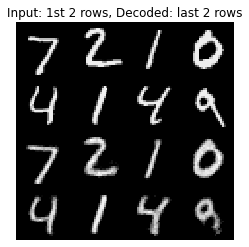

In [9]:
StopWatch.start("visualize")

imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig(f'images/input_and_decoded.png',dpi=300)
plt.savefig(f'images/input_and_decoded.pdf')
plt.savefig(f'images/input_and_decoded.svg')

StopWatch.stop("visualize")
StopWatch.stop("total")
StopWatch.progress(100)

if os_is_windows():
    user = os.environ["USERNAME"]
else:
    try:
        user = os.environ['USER']
    except:  # noqa: E722
        user = os.system('basename $HOME')

try:
    gpuname = ''
    for line in open('mnist_autoencoder.log', 'r'):
        if 'GPU' in line and line[-2] == ')':
            gpuname = gpuname + line[:line.find('(')] + '\n'
except:  # noqa: E722
    gpuname = cpuinfo.get_cpu_info()['brand_raw']

tag = 'mnist_autoencoder'

StopWatch.benchmark(tag=tag, node=gpuname, user=user)